# **Price Prediction in the Stock Market using Economic Indicators**
*(And a comparison of the pre- and post- COVID-19 market environment)*






In [104]:
#import necessary libraries/packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

## **Testing Post-COVID**

         GDP  BAMLHYH0A0HYM2TRIV  CPIAUCSL  UNRATE    SP500
0  10002.857              363.74     170.0     4.1  1394.46
1  10002.857              358.40     171.0     4.0  1366.42
2  10247.679              358.41     170.9     3.8  1498.58
3  10247.679              353.90     171.2     4.0  1452.43
4  10247.679              360.73     172.2     4.0  1420.60
    S&P 500 Price  Predicted Values
0         1362.16       1446.215300
1         1379.32       1499.850060
2         1406.58       1578.577670
3         1440.67       1582.489645
4         1412.16       1599.114145
..            ...               ...
95        3044.31       1660.561237
96        3100.29       1597.042751
97        3271.12       1869.545362
98        3500.31       1921.168653
99        3363.00       2063.332967

[100 rows x 2 columns]


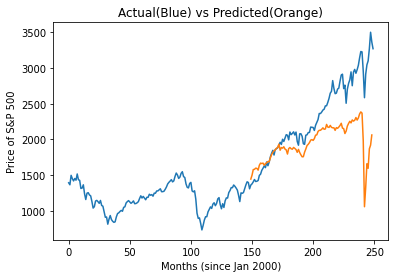

R-Squared Score:               0.7115036504502594 

GDP Coefficient:               -0.1872684561810091 

Corporate Bonds Coefficient:   1.542058517640268 

CPI Coefficient:               18.01662744578599 

UnemploymentRate Coefficient:  -129.92763923016392 

Intercept-Value:               51.66586864395936 



In [250]:
#read in dataset and assign to respective independent and dependent variables
dataset = pd.read_csv('https://raw.githubusercontent.com/eyb6/CS4347_Final/main/EconDataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(dataset.head())       #preview data

################################################################################
#initialize percentage of data to be used for testing/training                 #
testPct = 0.4
testMonthsRangeStart = len(dataset) - int((len(dataset)*testPct)+1)   #used for plotting later

################################################################################
#split data into testing and training data, and create predictions             #
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = testPct)

regressor = linear_model.LinearRegression()         #initialize to perform regression methods
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
actualVsPred = pd.DataFrame({'S&P 500 Price':y_test, 'Predicted Values':y_pred})
print(actualVsPred)

#################################################################################
#formatting to produce a graph comparing S&P 500 price(Actual) and predicted    #
#graph will include the entirety of SP500 price data (both testing and training)#
sp = pd.read_csv('https://raw.githubusercontent.com/eyb6/CS4347_Final/main/SP500.csv')
month = sp['MONTH']
price = sp['SP500']
plt.plot(month,price)

testMonths = [x for x in range(testMonthsRangeStart,len(dataset))]
plt.plot(testMonths,y_pred)

plt.xlabel('Months (since Jan 2000)')
plt.ylabel('Price of S&P 500')
plt.title('Actual(Blue) vs Predicted(Orange)')
plt.show()

#################################################################################
#related statistics for regression model                                        #
gdp_Coef = regressor.coef_[0]
corpBonds_Coef = regressor.coef_[1]
cpi_Coef = regressor.coef_[2]
unempRate_Coef = regressor.coef_[3]


print("R-Squared Score:              ",regressor.score(X,y),'\n')

print("GDP Coefficient:              ",gdp_Coef,'\n')
print("Corporate Bonds Coefficient:  ",corpBonds_Coef,'\n')
print("CPI Coefficient:              ",cpi_Coef,'\n')
print("UnemploymentRate Coefficient: ",unempRate_Coef,'\n')

print("Intercept-Value:              ",regressor.intercept_,'\n')

# **Pre-COVID Testing**

    S&P 500 Price  Predicted Values
0         1312.41       1447.186293
1         1365.68       1468.529259
2         1408.47       1463.425370
3         1397.91       1436.895016
4         1310.33       1461.951456
..            ...               ...
91        2926.46       2346.359349
92        2976.74       2308.459582
93        3037.56       2339.579861
94        3140.98       2398.966207
95        3230.78       2431.023938

[96 rows x 2 columns]


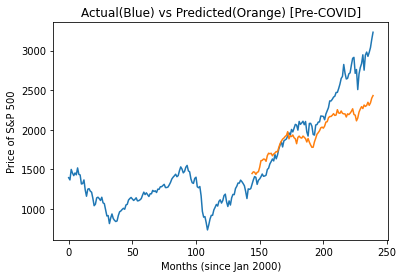

R-Squared Score:               0.8586599256690068 

GDP Coefficient:               -0.20378641381840226 

Corporate Bonds Coefficient:   1.6360864695388506 

CPI Coefficient:               19.52168925433537 

UnemploymentRate Coefficient:  -133.36828231469076 

Intercept-Value:               -56.84091133873562 



In [251]:
dataset_PreCOVID = pd.read_csv('https://raw.githubusercontent.com/eyb6/CS4347_Final/main/EconDataset(Before%20COVID).csv')
XPC = dataset_PreCOVID.iloc[:, :-1].values
yPC = dataset_PreCOVID.iloc[:, -1].values


################################################################################
testPctPC = 0.4
testMonthsRangeStartPC = len(dataset_PreCOVID) - int((len(dataset_PreCOVID)*testPctPC))

################################################################################
X_trainPC, X_testPC, y_trainPC, y_testPC = train_test_split(XPC, yPC, shuffle=False, test_size = testPctPC)

regressorPreCOVID = linear_model.LinearRegression()
regressorPreCOVID.fit(X_trainPC, y_trainPC)

y_predPC = regressorPreCOVID.predict(X_testPC)
actVsPredPC = pd.DataFrame({'S&P 500 Price':y_testPC, 'Predicted Values':y_predPC})
print(actVsPredPC)

################################################################################
sp_PreCOVID = pd.read_csv('https://raw.githubusercontent.com/eyb6/CS4347_Final/main/SP500_PreCOVID.csv')
monthPC = sp_PreCOVID['MONTH']
pricePC = sp_PreCOVID['SP500']
plt.plot(monthPC,pricePC)

testMonthsPC = [x for x in range(testMonthsRangeStartPC,len(dataset_PreCOVID))]
plt.plot(testMonthsPC,y_predPC)
plt.xlabel('Months (since Jan 2000)')
plt.ylabel('Price of S&P 500')
plt.title('Actual(Blue) vs Predicted(Orange) [Pre-COVID]')
plt.show()

################################################################################
gdp_CoefPC = regressorPreCOVID.coef_[0]
corpBonds_CoefPC = regressorPreCOVID.coef_[1]
cpi_CoefPC = regressorPreCOVID.coef_[2]
unempRate_CoefPC = regressorPreCOVID.coef_[3]

print("R-Squared Score:              ",regressorPreCOVID.score(XPC,yPC),'\n')

print("GDP Coefficient:              ",gdp_CoefPC,'\n')
print("Corporate Bonds Coefficient:  ",corpBonds_CoefPC,'\n')
print("CPI Coefficient:              ",cpi_CoefPC,'\n')
print("UnemploymentRate Coefficient: ",unempRate_CoefPC,'\n')

print("Intercept-Value:              ",regressorPreCOVID.intercept_,'\n')